*** 
<font color = green>

#  Home Task
</font>




***
<font color = green>

##  Sklearn SVM for Iris dataset
</font>



In [347]:
# YOUR_CODE.  Try linear, rbf and poly kernels 
# START_CODE 

In [348]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_multi_class_logistic_regression(X,y,dict_names=None, colors= None,  title =None):
    '''
    Draw the multi class samples of 2 features
    :param X: X 2 ndarray (m,2),
    :param y: vector (m,)
    :param dict_names: dict of values of y and names
    :return: None
    '''
    if not colors:
        colors_for_points = ['green','grey', 'orange', 'brown'] 
    else: 
         colors_for_points = colors 
            
    y_unique = list(set(y))

    for i in range (len(y_unique)):
        ind = y == y_unique[i] # vector

        if dict_names:
            plt.scatter(X[ind,0], X[ind,1], c=colors_for_points[i], s=40, label=dict_names[y_unique[i]],edgecolor='black', alpha=.7)
        else:
            plt.scatter(X[ind, 0], X[ind, 1], s=40, c=colors_for_points [i], edgecolor = 'black', alpha = 0.7)
    if title:
        plt.title(title)

    if dict_names:
        plt.legend(frameon=True)

In [349]:
from sklearn.datasets import load_iris

iris = load_iris()
X_data, y_data, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']

X = pd.DataFrame(X_data, columns=feature_names)
y = pd.Series(y_data, name='target')

features_dict = {k:v for k,v in  enumerate(labels)}
y_labels = y.apply(lambda x: features_dict[x])
y_labels.name = 'label'

pd.concat([X, y, y_labels], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


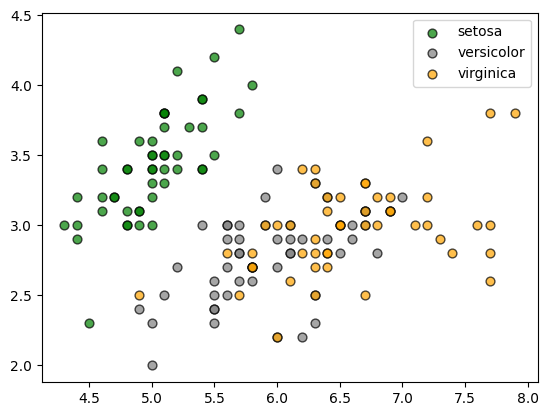

In [350]:
plot_multi_class_logistic_regression(X.to_numpy(), y.to_numpy(), dict_names=features_dict)

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LinearSVC model
linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, y_train)

print('LinearSVC train accuracy:', linear_svc.score(X_train, y_train))
print('LinearSVC test accuracy:', linear_svc.score(X_test, y_test))

# SVM models with linear, rbf and polynomial kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_poly = SVC(kernel='poly', degree=2)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

print()
print('SVM with linear kernel train accuracy:', svm_linear.score(X_train, y_train))
print('SVM with linear kernel test accuracy:', svm_linear.score(X_test, y_test))
print()
print('SVM with rbf kernel train accuracy:', svm_rbf.score(X_train, y_train))
print('SVM with rbf kernel test accuracy:', svm_rbf.score(X_test, y_test))
print()
print('SVM with polynomial kernel train accuracy:', svm_poly.score(X_train, y_train))
print('SVM with polynomial kernel test accuracy:', svm_poly.score(X_test, y_test))

LinearSVC train accuracy: 0.9619047619047619
LinearSVC test accuracy: 1.0

SVM with linear kernel train accuracy: 0.9714285714285714
SVM with linear kernel test accuracy: 1.0

SVM with rbf kernel train accuracy: 0.9619047619047619
SVM with rbf kernel test accuracy: 1.0

SVM with polynomial kernel train accuracy: 0.9904761904761905
SVM with polynomial kernel test accuracy: 1.0


- With this particular train test split, train dataset appears to be more overlapping then the test set, so every model accuracy is lower on the train set. 

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# LinearSVC model
linear_svc = LinearSVC(max_iter=10000, C=0.1)
linear_svc.fit(X_train, y_train)

print('LinearSVC train accuracy:', linear_svc.score(X_train, y_train))
print('LinearSVC test accuracy:', linear_svc.score(X_test, y_test))

# SVM models with linear, rbf and polynomial kernels
svm_linear = SVC(kernel='linear', C=0.01)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=0.1)
svm_poly = SVC(kernel='poly', degree=2, C=0.1)
svm_poly3 = SVC(kernel='poly', degree=3, C=0.1)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_poly3.fit(X_train, y_train)

print()
print('SVM with linear kernel train accuracy:', svm_linear.score(X_train, y_train))
print('SVM with linear kernel test accuracy:', svm_linear.score(X_test, y_test))
print()
print('SVM with rbf kernel train accuracy:', svm_rbf.score(X_train, y_train))
print('SVM with rbf kernel test accuracy:', svm_rbf.score(X_test, y_test))
print()
print('SVM with polynomial kernel train accuracy:', svm_poly.score(X_train, y_train))
print('SVM with polynomial kernel test accuracy:', svm_poly.score(X_test, y_test))
print()
print('SVM with polynomial kernel of degree 3 train accuracy:', svm_poly3.score(X_train, y_train))
print('SVM with polynomial kernel of degree 3 test accuracy:', svm_poly3.score(X_test, y_test))

LinearSVC train accuracy: 0.9428571428571428
LinearSVC test accuracy: 0.8666666666666667

SVM with linear kernel train accuracy: 0.8857142857142857
SVM with linear kernel test accuracy: 0.8444444444444444

SVM with rbf kernel train accuracy: 0.8571428571428571
SVM with rbf kernel test accuracy: 0.8

SVM with polynomial kernel train accuracy: 0.9523809523809523
SVM with polynomial kernel test accuracy: 0.9555555555555556

SVM with polynomial kernel of degree 3 train accuracy: 0.9714285714285714
SVM with polynomial kernel of degree 3 test accuracy: 0.9777777777777777


- Comparing train and test accuracies I can assume that polynomial kernel for this dataset both performs and generalizes the best.

In [353]:
# END_CODE 

***
<font color = green>

##  Spam/Non-spam classification
</font>




<font color = green>

###  Problem statement
</font>

Spam filter classifies emails into spam and non-spam email. 
For this task use SVMs to build your spam filter.
This is binary classification  - whether a given email, x, is spam (y = 1) or non-spam (y = 0).
In particular, you need to convert each email into a feature vector x. 
The dataset for this task is based on a a subset of the SpamAssassin Public Corpus.
For the purpose of this exercise, it will use the body of the email (excluding the email headers)


<font color = green>

###  Preprocessing mail
</font>

Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. Below is a sample email that contains a URL, an email address (at the end), numbers, and dollar amounts. While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g., the specific URL or specific dollar amount) will be different in almost every email. Therefore, one method often employed in processing emails is to “normalize” these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, replace each URL in the email with the unique string “http_addr” to indicate that a URL was present.
This lets the spam classifier to make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small.


<font color = green>

### Reveiw sample mail 
</font>



In [354]:
def get_sample(fn):
    with open(fn, 'r') as f:
        content = f.read()
    return content
    
content = get_sample('../data/svm/emailSample1.txt')
print(content)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




<font color = green>

### Preprocessing and normalization steps
</font>

Preprocessing and normalization includes the following steps:
<ul>
<li> <b>Lower-casing</b>: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).
    
<li> <b>Stripping HTML</b>: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.
<li> <b>Normalizing URLs</b>: All URLs are replaced with the text “httpaddr”.
<li> <b>Normalizing Email Addresses</b>: All email addresses are replaced
with the text “emailaddr”.
<li> <b>Normalizing Numbers</b>: All numbers are replaced with the text
“number”.
<li> <b>Normalizing Dollars</b>: All dollar signs ($) are replaced with the text
“dollar”.
<li> <b>Word Stemming</b>: Words are reduced to their stemmed form. For ex- ample, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips o↵ additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.
<li> <b>Removal of non-words</b>: Non-words and punctuation have been re- moved. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.
</ul>

<font color = green>

### Word tokenization
</font>


In [355]:
import re

In [356]:
def word_tokeniize(content):
    '''
    content: str - body of mail 
    return: list of tokens (str) e.g. ['>', 'Anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a']
    '''
    # YOUR_CODE.  Split the content to tokens. You may need re.split()
    # START_CODE 
    
    tokens = re.split('\s+', content)
    # END_CODE 
    
    return tokens

<font color = blue >

### Check result

</font>


In [357]:
tokens  = word_tokeniize('''> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n''')
tokens

['>',
 'Anyone',
 'knows',
 'how',
 'much',
 'it',
 'costs',
 'to',
 'host',
 'a',
 'web',
 'portal',
 '?',
 '>',
 'Well,',
 'it',
 'depends',
 'on',
 'how',
 'many',
 'visitors',
 "you're",
 'expecting.',
 'This',
 'can',
 'be',
 'anywhere',
 'from',
 'less',
 'than',
 '10',
 'bucks',
 'a',
 'month',
 'to',
 'a',
 'couple',
 'of',
 '$100.',
 'You',
 'should',
 'checkout',
 'http://www.rackspace.com/',
 'or',
 'perhaps',
 'Amazon',
 'EC2',
 'if',
 'youre',
 'running',
 'something',
 'big..',
 'To',
 'unsubscribe',
 'yourself',
 'from',
 'this',
 'mailing',
 'list,',
 'send',
 'an',
 'email',
 'to:',
 'groupname-unsubscribe@egroups.com',
 '']

<font color = blue >

### Expected output

</font>

`array(['>', 'Anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '?', '>', 'Well', 'it', 'depends', 'on',
       'how', 'many', 'visitors', "you're", 'expecting.', 'This', 'can',
       'be', 'anywhere', 'from', 'less', 'than', '10', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', '$100.', '', 'You', 'should',
       'checkout', 'http://www.rackspace.com/', 'or', 'perhaps', 'Amazon',
       'EC2', '', 'if', 'youre', 'running', 'something', 'big..', '',
       'To', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to:', 'groupname-unsubscribe@egroups.com',
       '', ''], dtype='<U33')`

<font color = green>

### Lower case 
</font>


In [358]:
def lower_case(tokens):
    '''
    tokens: ndarry of str
    return: ndarry of tokens in lower case (str)
    '''
    # YOUR_CODE.  Make all tokens in lower case
    # START_CODE 
    tokens = list(map(str.lower, tokens))
    # END_CODE 
   
    return tokens

<font color = blue >

### Check result

</font>


In [359]:
tokens = lower_case(tokens)
tokens

['>',
 'anyone',
 'knows',
 'how',
 'much',
 'it',
 'costs',
 'to',
 'host',
 'a',
 'web',
 'portal',
 '?',
 '>',
 'well,',
 'it',
 'depends',
 'on',
 'how',
 'many',
 'visitors',
 "you're",
 'expecting.',
 'this',
 'can',
 'be',
 'anywhere',
 'from',
 'less',
 'than',
 '10',
 'bucks',
 'a',
 'month',
 'to',
 'a',
 'couple',
 'of',
 '$100.',
 'you',
 'should',
 'checkout',
 'http://www.rackspace.com/',
 'or',
 'perhaps',
 'amazon',
 'ec2',
 'if',
 'youre',
 'running',
 'something',
 'big..',
 'to',
 'unsubscribe',
 'yourself',
 'from',
 'this',
 'mailing',
 'list,',
 'send',
 'an',
 'email',
 'to:',
 'groupname-unsubscribe@egroups.com',
 '']

<font color = blue >

### Expected output

</font>

`array(['>', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '?', '>', 'well', 'it', 'depends', 'on',
       'how', 'many', 'visitors', "you're", 'expecting.', 'this', 'can',
       'be', 'anywhere', 'from', 'less', 'than', '10', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', '$100.', '', 'you', 'should',
       'checkout', 'http://www.rackspace.com/', 'or', 'perhaps', 'amazon',
       'ec2', '', 'if', 'youre', 'running', 'something', 'big..', '',
       'to', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to:', 'groupname-unsubscribe@egroups.com',
       '', ''], dtype='<U33')`

<font color = green>

### Normalize
</font>


In [360]:
def normalize_tokens (tokens):
    '''
    tokens: ndarry of str
    return: ndarry of tokens replaced with corresponding unified words
    '''
    # YOUR_CODE.  
        # Remove html and other tags
        # mark all numbers "number"
        # mark all  urls as "httpaddr"
        # mark all emails as "emailaddr"
        # replace $ as "dollar"
        # get rid of any punctuation
        # Remove any non alphanumeric characters
    
    #  You may  need re.sub()
    # START_CODE 
    def normalize_token(token):
        token = re.sub('<.*>|<[^>]+|[^<]+>', ' ', token)
        token = re.sub('\d+', 'number', token)
        token = re.sub('(http|https)://[^\s]*', 'httpaddr', token)
        token = re.sub('[^\s]+@[^\s]+', 'emailaddr', token)
        token = re.sub('[$]+', 'dollar', token)
        token = re.sub('[^\w]', '', token)
        return token

    tokens = list(map(lambda x: normalize_token(x), tokens))
    # END_CODE 

    return tokens

<font color = blue >

### Check result

</font>


In [361]:
tokens = normalize_tokens(tokens)
tokens

['',
 'anyone',
 'knows',
 'how',
 'much',
 'it',
 'costs',
 'to',
 'host',
 'a',
 'web',
 'portal',
 '',
 '',
 'well',
 'it',
 'depends',
 'on',
 'how',
 'many',
 'visitors',
 'youre',
 'expecting',
 'this',
 'can',
 'be',
 'anywhere',
 'from',
 'less',
 'than',
 'number',
 'bucks',
 'a',
 'month',
 'to',
 'a',
 'couple',
 'of',
 'dollarnumber',
 'you',
 'should',
 'checkout',
 'httpaddr',
 'or',
 'perhaps',
 'amazon',
 'ecnumber',
 'if',
 'youre',
 'running',
 'something',
 'big',
 'to',
 'unsubscribe',
 'yourself',
 'from',
 'this',
 'mailing',
 'list',
 'send',
 'an',
 'email',
 'to',
 'emailaddr',
 '']

<font color = blue >

### Expected output

</font>

`array(['', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '', '', 'well', 'it', 'depends', 'on', 'how',
       'many', 'visitors', 'youre', 'expecting', 'this', 'can', 'be',
       'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', 'dollarnumber', '', 'you',
       'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon',
       'ecnumber', '', 'if', 'youre', 'running', 'something', 'big', '',
       'to', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to', 'emailaddr', '', ''], dtype='<U12')`

<font color = green>

### Remove zero length tokens
</font>


In [362]:
def filter_short_tokens (tokens):
    '''
    tokens: ndarry of str
    return: ndarry of filtered tokens (str)
    '''
    original_tokens_len = len(tokens)
    
    # YOUR_CODE. Keep only tokens that lenght >0  
    # START_CODE 
    tokens = list(filter(len, tokens))
    # END_CODE     
   
    print ('Original len= {}\nRemaining len= {}'.format(original_tokens_len, len(tokens)))    
    
    return tokens


<font color = blue >

### Check result

</font>


In [363]:
tokens = filter_short_tokens(tokens)
tokens

Original len= 65
Remaining len= 61


['anyone',
 'knows',
 'how',
 'much',
 'it',
 'costs',
 'to',
 'host',
 'a',
 'web',
 'portal',
 'well',
 'it',
 'depends',
 'on',
 'how',
 'many',
 'visitors',
 'youre',
 'expecting',
 'this',
 'can',
 'be',
 'anywhere',
 'from',
 'less',
 'than',
 'number',
 'bucks',
 'a',
 'month',
 'to',
 'a',
 'couple',
 'of',
 'dollarnumber',
 'you',
 'should',
 'checkout',
 'httpaddr',
 'or',
 'perhaps',
 'amazon',
 'ecnumber',
 'if',
 'youre',
 'running',
 'something',
 'big',
 'to',
 'unsubscribe',
 'yourself',
 'from',
 'this',
 'mailing',
 'list',
 'send',
 'an',
 'email',
 'to',
 'emailaddr']

<font color = blue >

### Expected output

</font>

`Original len= 69
Remaining len= 61
array(['anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depends', 'on', 'how', 'many',
       'visitors', 'youre', 'expecting', 'this', 'can', 'be', 'anywhere',
       'from', 'less', 'than', 'number', 'bucks', 'a', 'month', 'to', 'a',
       'couple', 'of', 'dollarnumber', 'you', 'should', 'checkout',
       'httpaddr', 'or', 'perhaps', 'amazon', 'ecnumber', 'if', 'youre',
       'running', 'something', 'big', 'to', 'unsubscribe', 'yourself',
       'from', 'this', 'mailing', 'list', 'send', 'an', 'email', 'to',
       'emailaddr'], dtype='<U12')`

<font color = green>

### Stem tokens
</font>


In [364]:
from nltk.stem import PorterStemmer

In [365]:
def stem_tokens(tokens):
    '''
    tokens: ndarry of str
    return: ndarry of stemmed tokens e.g. array(['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani']...
    '''
    # YOUR_CODE. replace the tokens by stemmed form. You may need PorterStemmer.stem() 
    # START_CODE 
    tokens = list(map(PorterStemmer().stem, tokens))
    # END_CODE     
   
    return tokens

<font color = blue >

### Check result

</font>


In [366]:
tokens = stem_tokens(tokens)
tokens

['anyon',
 'know',
 'how',
 'much',
 'it',
 'cost',
 'to',
 'host',
 'a',
 'web',
 'portal',
 'well',
 'it',
 'depend',
 'on',
 'how',
 'mani',
 'visitor',
 'your',
 'expect',
 'thi',
 'can',
 'be',
 'anywher',
 'from',
 'less',
 'than',
 'number',
 'buck',
 'a',
 'month',
 'to',
 'a',
 'coupl',
 'of',
 'dollarnumb',
 'you',
 'should',
 'checkout',
 'httpaddr',
 'or',
 'perhap',
 'amazon',
 'ecnumb',
 'if',
 'your',
 'run',
 'someth',
 'big',
 'to',
 'unsubscrib',
 'yourself',
 'from',
 'thi',
 'mail',
 'list',
 'send',
 'an',
 'email',
 'to',
 'emailaddr']

<font color = blue >

### Expected output

</font>

`array(['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani',
       'visitor', 'your', 'expect', 'thi', 'can', 'be', 'anywher', 'from',
       'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl',
       'of', 'dollarnumb', 'you', 'should', 'checkout', 'httpaddr', 'or',
       'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big',
       'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list',
       'send', 'an', 'email', 'to', 'emailaddr'], dtype='<U10')`

<font color = green>

### Vocabulary
</font>

Ususally vocabulary is built from the top most frequent tokens within all available training set.
For this task it is already prepared and provided in the `vocab.txt`

In [367]:
def get_vocabulary(fn):
    '''
    fn: str - full path to file 
    return: ndarray of str e.g. array(['aa', 'ab', 'abil', ..., 'zdnet', 'zero', 'zip'], dtype=object)
    '''
    vocab_list = pd.read_table(fn, header=None)
    vocab = np.array(vocab_list)[:,1] # first columns is index, select only words column  
    print ('len(vocab)= {:,}'.format(len(vocab)))
    return vocab

vocab = get_vocabulary('../data/svm/vocab.txt')
vocab

len(vocab)= 1,899


array(['aa', 'ab', 'abil', ..., 'zdnet', 'zero', 'zip'], dtype=object)

<font color = green>

### Feature reresentation
</font>

Every word in vocabulary is the feature of the mail - 1 is the word in in the mail and 0 otherwise. 
Thus every mail can be represented as the binary array of fixed length - number of words in vocabulary.

In [368]:
def represent_features(tokens,vocab):
    '''
    tokens: ndarry of str
    tokens: ndarry of str
    return: ndarry of binary values 1 if word from vocabulary is in mail 0 otherwise
    '''
    # YOUR_CODE. Compute the array with 1/0 corresponding to is word from vocabulary in mail 
    # START_CODE 
    tokens_represented = np.isin(vocab, tokens).astype(int)
    # END_CODE     

    print ('{} word(s) from vocab are in the tokens.'.format(np.sum(tokens_represented)))

   
    return tokens_represented


<font color = blue >

### Check result

</font>


In [369]:
tokens_represented = represent_features(tokens, vocab)
tokens_represented

44 word(s) from vocab are in the tokens.


array([0, 0, 0, ..., 0, 0, 0])

<font color = blue >

### Expected output

</font>

`44 word(s) from vocab are in the tokens.
array([0, 0, 0, ..., 0, 0, 0])`

<font color = green>

### Composing all steps of preprocessing 
</font>

Every word in vocabulary is the feature of the mail - 1 is the word in in the mail and 0 otherwise. 
Thus every mail can be represented as the binary array of fixed length - number of words in vocabulary.

In [370]:
def preprocess (content,vocab):
    '''
    content: str - body of mail 
    vocab: ndarray of str - list of considered words 
    '''
    # YOUR_CODE. Compute the array with 1/0 corresponding to is word from vocabulary in mail 
    # START_CODE 

    # tokenize content    
    tokens = word_tokeniize(content)
    
    # make lower case
    tokens = lower_case(tokens)

    # normalize tokens
    tokens = normalize_tokens(tokens)

    # remove zero words
    tokens = filter_short_tokens(tokens)
    
    # stem words
    tokens = stem_tokens(tokens)
    
    # convert to binary array of features  
    tokens_represented = represent_features(tokens, vocab)
    # END_CODE     
    
    return tokens_represented

<font color = blue >

### Check result

</font>


In [371]:
preprocess (content,vocab)

Original len= 65
Remaining len= 61
44 word(s) from vocab are in the tokens.


array([0, 0, 0, ..., 0, 0, 0])

<font color = blue >

### Expected output

</font>

`Original len= 69
Remaining len= 61
44 word(s) from vocab are in the tokens.
array([0, 0, 0, ..., 0, 0, 0])`

<font color = green>

### Training and test sets
</font>

All mails for training are preprocessed the same way as performed for sample above. 
The training set (array of feature representation) is provided in the `spamTrain.mat`
The corresponding test set is provided in the `spamTest.mat`

In [372]:
from scipy.io import loadmat

In [373]:
fn = '../data/svm/spamTrain.mat'

mat = loadmat(fn)
X_train= mat['X']
y_train= mat['y'].ravel()

print ('X_train.shape= {}',X_train.shape)
print ('y_train.shape= {}',y_train.shape)

fn = '../data/svm/spamTest.mat'
mat = loadmat(fn)
X_test = mat['Xtest']
y_test = mat['ytest'].ravel() 

print ('X_test.shape= {}',X_test.shape)
print ('y_test.shape= {}',y_test.shape)
index = range(6)
print ('Sample with index  ={}: \n{}'.format(index, X_train[index]))


X_train.shape= {} (4000, 1899)
y_train.shape= {} (4000,)
X_test.shape= {} (1000, 1899)
y_test.shape= {} (1000,)
Sample with index  =range(0, 6): 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<font color = green>

### Training  the model
</font>


In [374]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC

In [375]:
C = .1
clf= LinearSVC(C=C)
clf.fit(X_train,y_train)
print ('Score train= {}'.format(clf.score(X_train,y_train)))
print ('Score test= {}'.format(clf.score(X_test,y_test)))

Score train= 0.99975
Score test= 0.992


<font color = green>

### Determining most spam contributors
</font>


In [376]:
# print('clf.intercept_={}'.format(clf.intercept_))
# print ('clf.coef_={}'.format(clf.coef_))

# YOUR_CODE. Compute top 20 largest coeficients and return the corresponding 20 words from vocabulary
# START_CODE 
top_indices = clf.coef_.argsort()[0][-1:-21:-1]
top_spam_contributors = vocab[top_indices]
# END_CODE    



<font color = blue >

### Check result

</font>


In [377]:
print (top_spam_contributors)

['our' 'remov' 'click' 'basenumb' 'guarante' 'visit' 'bodi' 'will'
 'numberb' 'price' 'dollar' 'nbsp' 'below' 'lo' 'most' 'send' 'dollarnumb'
 'credit' 'wi' 'hour']


<font color = blue >

### Expected output

</font>

`['our' 'remov' 'click' 'basenumb' 'guarante' 'visit' 'bodi' 'will'
 'numberb' 'price' 'dollar' 'nbsp' 'below' 'lo' 'most' 'send' 'dollarnumb'
 'credit' 'wi' 'hour']`

<font color = green>

### Use model for prediction 
</font>


In [378]:
import os

for sfn in [ 'emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']:
    fn = os.path.join('../data/svm', sfn)    
    content = get_sample(fn)
    
    # YOUR_CODE.  Preprocess the sample and get prediction 0 or 1 (1 is spam)
    # START_CODE 
    features = preprocess(content, vocab)
    prediction = clf.predict(features.reshape(1,-1))[0]
    # END_CODE    
    
    print ('{} is {}\n'.format(sfn, ('Not Spam','Spam')[prediction]))

print ('Latter sample:\n{1}\n{0}\n{1}'.format(content, '='*50))

Original len= 65
Remaining len= 61
44 word(s) from vocab are in the tokens.
emailSample1.txt is Not Spam

Original len= 228
Remaining len= 222
122 word(s) from vocab are in the tokens.
emailSample2.txt is Not Spam

Original len= 99
Remaining len= 97
46 word(s) from vocab are in the tokens.
spamSample1.txt is Spam

Original len= 35
Remaining len= 31
18 word(s) from vocab are in the tokens.
spamSample2.txt is Spam

Latter sample:
Best Buy Viagra Generic Online

Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100% Quality & Satisfaction guaranteed!

We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru





<font color = blue >

### Expected output

</font>

`Original len= 69
Remaining len= 61
44 word(s) from vocab are in the tokens.
emailSample1.txt is Not Spam`

`Original len= 247
Remaining len= 222
122 word(s) from vocab are in the tokens.
emailSample2.txt is Not Spam`

`Original len= 141
Remaining len= 97
46 word(s) from vocab are in the tokens.
spamSample1.txt is Spam`

`Original len= 39
Remaining len= 31
18 word(s) from vocab are in the tokens.
spamSample2.txt is Spam`

`Latter sample:`

`==================================================`

`Best Buy Viagra Generic Online`

`Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100\% Quality & Satisfaction guaranteed!`

`We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru`


`==================================================`

<font color = green>

# Congratulation!
</font>

Now you know how to build Spam/Non-Spam classifier

